In [6]:
import pandas as pd
cal_train = pd.read_csv("sample_data/california_housing_train.csv")
cal_test = pd.read_csv("sample_data/california_housing_test.csv")

# 2.2 큰 그림 보기
- 어떤 데이터들을 갖고, 가격을 예측하는 문제
  - 전통적인 회귀(regression) 문제
    - 얼마나 가격을 잘 맞췄는가?
    - 평균 제곱근 오차(RMSE)

# 2.3 데이터 가져오기

In [9]:
# 학습데이터 살펴보기
cal_train.info()
cal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housin

In [8]:
cal_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# 2.4 데이터 이해를 위한 탐색과 시각화

In [10]:
cal_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f240847dc50>,
      dtype=object)

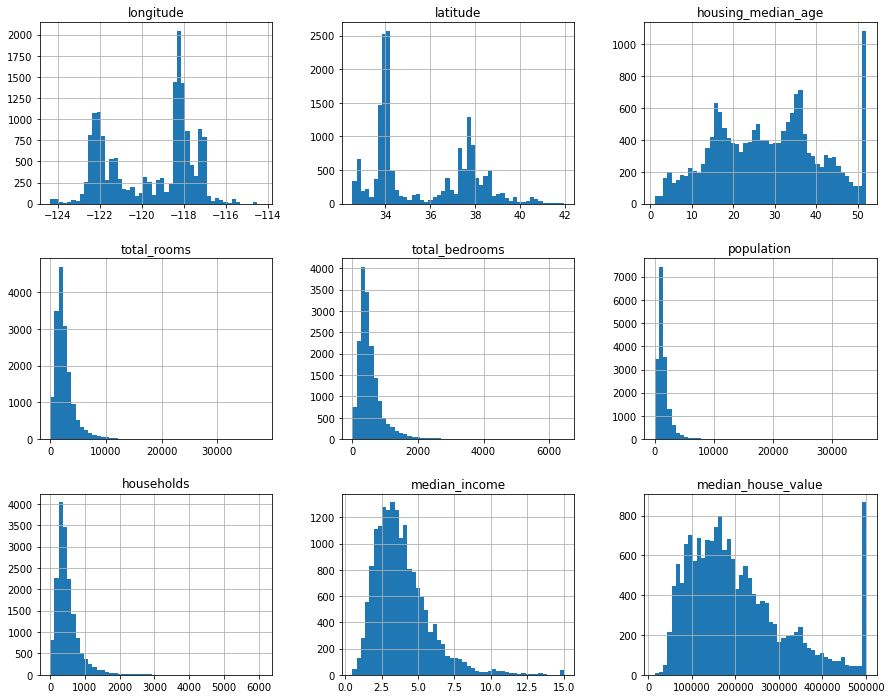

In [13]:
cal_train.hist(figsize=(15, 12), bins=50)

In [20]:
cal_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


# 2.5 머신러닝 알고리즘을 위한 데이터 준비
- 데이터 정제
- 텍스트와 범주형 특성 다루기
- 특성 스케일링
- 특성 공학

In [27]:
X_train = cal_train.loc[:, cal_train.columns != "median_house_value"]
y_train = cal_train.loc[:, cal_train.columns == "median_house_value"]

X_test = cal_test.loc[:, cal_test.columns != "median_house_value"]
y_test = cal_test.loc[:, cal_test.columns == "median_house_value"]

In [29]:
from sklearn.preprocessing import StandardScaler

X_standard_scaler = StandardScaler()
y_standard_scaler = StandardScaler()

X_train_scaled = X_standard_scaler.fit_transform(X_train)
X_test_scaled = X_standard_scaler.transform(X_test)

y_train_scaled = y_standard_scaler.fit_transform(y_train)
y_test_scaled = y_standard_scaler.transform(y_test)

# 2.6 모델 선택과 훈련

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [33]:
# RMSE 점수 - 낮을 수록 좋음
model.score(X_test, y_test)

0.6195057678312047

# 2.7 모델 세부 튜닝

In [35]:
model_tuning = LinearRegression(normalize=True).fit(X_train, y_train)
model.score(X_test, y_test)

0.6195057678312047